In [1]:
import pylcp
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants as const
from sympy.physics.wigner import wigner_3j, wigner_6j, wigner_9j

In [2]:
gamma = 2*np.pi*84e6 # Hz
k = 2*np.pi/227.5e-9 # m^-1

t_unit = 1/gamma
#t_unit = 1e-1

m_unit = 1/k
#m_unit = 1e-9

velocity_unit = m_unit/t_unit
accel_unit = m_unit/t_unit**2
Hz_unit = 1/t_unit
Js_unit = const.hbar # kg m^2/s
mass_unit = Js_unit*t_unit/m_unit**2
HzperT_unit = const.value("Bohr magneton")/(Js_unit)
T_unit = Hz_unit/HzperT_unit
amu_unit = mass_unit/1.66e-27
cm_unit = m_unit/1e-2
F_unit = mass_unit*m_unit/t_unit**2
I_sat = (np.pi*const.h*const.c*gamma)/(3*227.5e-9**3) # W/m^2

In [3]:
print(t_unit)
print(cm_unit)
print(velocity_unit)
print(accel_unit)

1.8947017034749446e-09
3.6207749553406186e-06
19.11
10086020382.496958


In [4]:
ksim=k*m_unit
gammasim=gamma/Hz_unit
print(ksim)
print(gammasim)

1.0
1.0000000000000002


In [5]:
labels = [(3/2,1),(3/2,2),(5/2,2),(5/2,3),(7/2,3),(7/2,4)]
full_labels = np.concatenate([[(i[0], i[1], j) for j in np.arange(-i[1],i[1]+1,1)] for i in labels])

In [6]:
mu_q = {}
d_q = {}
H0 = {}

In [7]:
mu_q['X(v=0)'] = np.zeros((3,full_labels.shape[0],full_labels.shape[0]))
#mu_q['X(v=1)'] = np.zeros((3,full_labels.shape[0],full_labels.shape[0]))
H0['X(v=0)'] = (2*np.pi/Hz_unit)*np.diag(np.concatenate([[11.235e6]*8, [0]*12, [7.914e6]*16]))
#H0['X(v=1)'] = np.zeros((full_labels.shape[0],full_labels.shape[0]))
H0['A(v=0)'] = (2*np.pi/Hz_unit)*np.diag([9.06039e7, 9.06039e7, 9.06039e7, 0., 0., 0., 0., 0., 2.09987e8, 2.09987e8, 2.09987e8, 2.09987e8, 2.09987e8, 1.99498e8, 1.99498e8, 1.99498e8, 1.99498e8, 1.99498e8, 1.99498e8, 1.99498e8, 3.61039e8, 3.61039e8, 3.61039e8, 3.61039e8, 3.61039e8, 3.61039e8, 3.61039e8, 4.36374e8, 4.36374e8, 4.36374e8, 4.36374e8, 4.36374e8, 4.36374e8, 4.36374e8, 4.36374e8, 4.36374e8])

In [8]:
def AState_mu_q(J, lbls, I1, I2):
    def matrix_element(p,F1,F,MF,F1p,Fp,MFp):
        return float((-1)**(F-MF+F1p+F+I2+1+J+F1+I1+1)*np.sqrt((2*F+1)*(2*Fp+1)*(2*F1+1)*(2*F1p+1)*(2*J+1)*(2*J+1))*wigner_3j(F,1,Fp,-MF,p,MFp)*wigner_3j(J,1,J,-1,0,1)*wigner_6j(F1p,Fp,I2,F,F1,1)*wigner_6j(J,F1p,I1,F1,J,1))
    
    return np.array([[[matrix_element(i,*l2,*l1) for l2 in lbls] for l1 in lbls] for i in [-1,0,1]])

In [9]:
mu_q['A(v=0)'] = AState_mu_q(1, full_labels, 5/2,1/2)

In [10]:
dijq = np.array([[[0, 0.35304819526102776, 0], [0, 0, -0.35304819526102776], [0, 0, 0], [0.05581760941791929, 0, 0], [0, -0.03946901012903283, 0], [0, 0, 0.02278744362264517], [0, 0, 0], [0, 0, 0], [0.6677710584047486, 0, 0], [0, -0.4721854436781158, 0], [0, 0, 0.272616393014983], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0.35304819526102776, 0, 0], [0, 0., 0], [0, 0, -0.35304819526102776], [0, 0, 0], [0.03946901012903283, 0, 0], [0, -0.04557488724529034, 0], [0, 0, 0.03946901012903283], [0, 0, 0], [0, 0, 0], [0.4721854436781158, 0, 0], [0, -0.545232786029966, 0], [0, 0, 0.4721854436781158], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0.35304819526102776, 0, 0], [0, -0.35304819526102776, 0], [0, 0, 0], [0, 0, 0], [0.02278744362264517, 0, 0], [0, -0.03946901012903283, 0], [0, 0, 0.05581760941791929], [0, 0, 0], [0, 0, 0], [0.272616393014983, 0, 0], [0, -0.4721854436781158, 0], [0, 0, 0.6677710584047486], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, -0.17449995614010205], [0, 0, 0], [0, 0, 0], [0, -0.4577750113891102, 0], [0, 0, 0.32369581481098886], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.023497211103777865, 0], [0, 0, 0.01661503731045317], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.6357140230701519, 0, 0], [0, 0.3670296623471722, 0], [0, 0, -0.16414065495341443], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.24677980589841625, 0, 0], [0, -0.14247838736601423, 0], [0, 0, 0.06371827189499102], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, -0.12339010230342129, 0], [0, 0, -0.12339010230342129], [0, 0, 0], [-0.32369581481098886, 0, 0], [0, -0.2288875056945551, 0], [0, 0, 0.3964447890806802], [0, 0, 0], [0, 0, 0], [-0.01661503731045317, 0, 0], [0, -0.011748605551888933, 0], [0, 0, 0.020349181733957424], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5190583262845886, 0, 0], [0, 0.4642598807438424, 0], [0, 0, -0.28429995396694585], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.20149486775806477, 0, 0], [0, -0.18022248856974538, 0], [0, 0, 0.11036328429261245], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[-0.07123930878021573, 0, 0], [0, -0.14247861756043145, 0], [0, 0, -0.07123930878021573], [0, 0, 0], [-0.3964447890806802, 0, 0], [0, 0., 0], [0, 0, 0.3964447890806802], [0, 0, 0], [0, 0, 0], [-0.020349181733957424, 0, 0], [0, 0., 0], [0, 0, 0.020349181733957424], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.40206085068210146, 0, 0], [0, 0.49242196486024326, 0], [0, 0, -0.40206085068210146], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.15607725343465012, 0, 0], [0, -0.19115481568497303, 0], [0, 0, 0.15607725343465012], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [-0.12339010230342129, 0, 0], [0, -0.12339010230342129, 0], [0, 0, 0], [0, 0, 0], [-0.3964447890806802, 0, 0], [0, 0.2288875056945551, 0], [0, 0, 0.32369581481098886], [0, 0, 0], [0, 0, 0], [-0.020349181733957424, 0, 0], [0, 0.011748605551888933, 0], [0, 0, 0.01661503731045317], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.28429995396694585, 0, 0], [0, 0.4642598807438424, 0], [0, 0, -0.5190583262845886], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.11036328429261245, 0, 0], [0, -0.18022248856974538, 0], [0, 0, 0.20149486775806477], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [-0.17449995614010205, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.32369581481098886, 0, 0], [0, 0.4577750113891102, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.01661503731045317, 0, 0], [0, 0.023497211103777865, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.16414065495341443, 0, 0], [0, 0.3670296623471722, 0], [0, 0, -0.6357140230701519], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.06371827189499102, 0, 0], [0, -0.14247838736601423, 0], [0, 0, 0.24677980589841625], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, -0.6480569797436475], [0, 0, 0], [0, 0, 0], [0, 0.10267769371443052, 0], [0, 0, -0.07260409350206916], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.23768910631140486, 0], [0, 0, 0.16807157888696458], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.259538377295067, 0, 0], [0, -0.1498445519963456, 0], [0, 0, 0.06701252086436613], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.5238464644064819, 0, 0], [0, -0.30244289723911605, 0], [0, 0, 0.1352565755077294], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, -0.45824548497200623, 0], [0, 0, -0.45824548497200623], [0, 0, 0], [0.07260409350206916, 0, 0], [0, 0.05133884685721526, 0], [0, 0, -0.0889214911586946], [0, 0, 0], [0, 0, 0], [-0.16807157888696458, 0, 0], [0, -0.11884455315570243, 0], [0, 0, 0.20584480426849677], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.21191219768095237, 0, 0], [0, -0.18954003171039313, 0], [0, 0, 0.11606909088035157], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.42771884711897024, 0, 0], [0, -0.382563366966343, 0], [0, 0, 0.23427126083716351], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[-0.26456815410351836, 0, 0], [0, -0.5291363082070367, 0], [0, 0, -0.26456815410351836], [0, 0, 0], [0.0889214911586946, 0, 0], [0, 0., 0], [0, 0, -0.0889214911586946], [0, 0, 0], [0, 0, 0], [-0.20584480426849677, 0, 0], [0, 0., 0], [0, 0, 0.20584480426849677], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.16414648249530853, 0, 0], [0, -0.20103756259309835, 0], [0, 0, 0.16414648249530853], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.33130959435016155, 0, 0], [0, -0.4057697265231882, 0], [0, 0, 0.33130959435016155], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [-0.45824548497200623, 0, 0], [0, -0.45824548497200623, 0], [0, 0, 0], [0, 0, 0], [0.0889214911586946, 0, 0], [0, -0.05133884685721526, 0], [0, 0, -0.07260409350206916], [0, 0, 0], [0, 0, 0], [-0.20584480426849677, 0, 0], [0, 0.11884455315570243, 0], [0, 0, 0.16807157888696458], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.11606909088035157, 0, 0], [0, -0.18954003171039313, 0], [0, 0, 0.21191219768095237], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.23427126083716351, 0, 0], [0, -0.382563366966343, 0], [0, 0, 0.42771884711897024], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [-0.6480569797436475, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.07260409350206916, 0, 0], [0, -0.10267769371443052, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.16807157888696458, 0, 0], [0, 0.23768910631140486, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.06701252086436613, 0, 0], [0, -0.1498445519963456, 0], [0, 0, 0.259538377295067], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.1352565755077294, 0, 0], [0, -0.30244289723911605, 0], [0, 0, 0.5238464644064819], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, -0.662067951237325], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0.1798085031690214], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.14955337350005393, 0], [0, 0, 0.08634468044847278], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0.17609495930165456, 0], [0, 0, -0.10166847215574645], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.5965940533333333, 0, 0], [0, -0.29829702666666663, 0], [0, 0, 0.11274567848428604], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.38224510986869364, 0], [0, 0, -0.5405762185271004], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0.1038124877072182, 0], [0, 0, 0.14681302805923818], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.08634468044847278, 0, 0], [0, -0.09970224900003596, 0], [0, 0, 0.11147050313684542], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.10166847215574645, 0, 0], [0, 0.11739663953443638, 0], [0, 0, -0.1312534331645195], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.516665605933395, 0, 0], [0, -0.39056248693721735, 0], [0, 0, 0.19528124346860867], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.17094520994665494, 0, 0], [0, -0.483506068658551, 0], [0, 0, -0.41872853834224816], [0, 0, 0], [0, 0, 0], [0.046426355885340234, 0, 0], [0, 0.13131356428921623, 0], [0, 0, 0.11372088253594233], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.11147050313684542, 0, 0], [0, -0.04985112450001798, 0], [0, 0, 0.12210981812900125], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.1312534331645195, 0, 0], [0, 0.05869831976721819, 0], [0, 0, -0.143780932188408], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.4366621351264958, 0, 0], [0, -0.4366621351264958, 0], [0, 0, 0.2761693829903888], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.2960857889381349, 0, 0], [0, -0.5128356298399648, 0], [0, 0, -0.2960857889381349], [0, 0, 0], [0, 0, 0], [0.08041280720368364, 0, 0], [0, 0.1392790676560207, 0], [0, 0, 0.08041280720368364], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.12210981812900125, 0, 0], [0, 0., 0], [0, 0, 0.12210981812900125], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.143780932188408, 0, 0], [0, 0., 0], [0, 0, -0.143780932188408], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.35653314035138445, 0, 0], [0, -0.4509827139371442, 0], [0, 0, 0.35653314035138445], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.41872853834224816, 0, 0], [0, -0.483506068658551, 0], [0, 0, -0.17094520994665494], [0, 0, 0], [0, 0, 0], [0.11372088253594233, 0, 0], [0, 0.13131356428921623, 0], [0, 0, 0.046426355885340234], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.12210981812900125, 0, 0], [0, 0.04985112450001798, 0], [0, 0, 0.11147050313684542], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.143780932188408, 0, 0], [0, -0.05869831976721819, 0], [0, 0, -0.1312534331645195], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.2761693829903888, 0, 0], [0, -0.4366621351264958, 0], [0, 0, 0.4366621351264958], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5405762185271004, 0, 0], [0, -0.38224510986869364, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.14681302805923818, 0, 0], [0, 0.1038124877072182, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.11147050313684542, 0, 0], [0, 0.09970224900003596, 0], [0, 0, 0.08634468044847278], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.1312534331645195, 0, 0], [0, -0.11739663953443638, 0], [0, 0, -0.10166847215574645], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.19528124346860867, 0, 0], [0, -0.39056248693721735, 0], [0, 0, 0.516665605933395], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.662067951237325, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.1798085031690214, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.08634468044847278, 0, 0], [0, 0.14955337350005393, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.10166847215574645, 0, 0], [0, -0.17609495930165456, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.11274567848428604, 0, 0], [0, -0.29829702666666663, 0], [0, 0, 0.5965940533333333]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, -0.19468707351513623], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, -0.549834326422256], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.14055931028242558, 0], [0, 0, 0.08115195562866655], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.6778630811094402, 0], [0, 0, 0.3913644323522444], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.13074899566666665, 0, 0], [0, -0.06537449783333332, 0], [0, 0, 0.024709237621818696], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.11240263430170437, 0], [0, 0, -0.1589613298759336], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.3174469963695861, 0], [0, 0, -0.44893784760047134], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.08115195562866655, 0, 0], [0, -0.0937062068549504, 0], [0, 0, 0.10476672422066294], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.3913644323522444, 0, 0], [0, -0.45190872073962685, 0], [0, 0, 0.5052493095993873], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.11323195176663484, 0, 0], [0, -0.08559530995456473, 0], [0, 0, 0.042797654977282364], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.05026798622973212, 0, 0], [0, -0.14217933575854227, 0], [0, 0, -0.12313091666009486], [0, 0, 0], [0, 0, 0], [-0.14196661262710472, 0, 0], [0, -0.4015422179628379, 0], [0, 0, -0.34774576144776576], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.10476672422066294, 0, 0], [0, -0.0468531034274752, 0], [0, 0, 0.11476619626315987], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5052493095993873, 0, 0], [0, -0.22595436036981342, 0], [0, 0, 0.5534728880629918], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.0956984658067856, 0, 0], [0, -0.0956984658067856, 0], [0, 0, 0.06052502410663711], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.08706670614406871, 0, 0], [0, -0.15080395868919635, 0], [0, 0, -0.08706670614406871], [0, 0, 0], [0, 0, 0], [-0.24589338604859465, 0, 0], [0, -0.42589983788131414, 0], [0, 0, -0.24589338604859465], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.11476619626315987, 0, 0], [0, 0., 0], [0, 0, 0.11476619626315987], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5534728880629918, 0, 0], [0, 0., 0], [0, 0, 0.5534728880629918], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.07813747013126932, 0, 0], [0, -0.09883695048727478, 0], [0, 0, 0.07813747013126932], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.12313091666009486, 0, 0], [0, -0.14217933575854227, 0], [0, 0, -0.05026798622973212], [0, 0, 0], [0, 0, 0], [-0.34774576144776576, 0, 0], [0, -0.4015422179628379, 0], [0, 0, -0.14196661262710472], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.11476619626315987, 0, 0], [0, 0.0468531034274752, 0], [0, 0, 0.10476672422066294], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5534728880629918, 0, 0], [0, 0.22595436036981342, 0], [0, 0, 0.5052493095993873], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.06052502410663711, 0, 0], [0, -0.0956984658067856, 0], [0, 0, 0.0956984658067856], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.1589613298759336, 0, 0], [0, -0.11240263430170437, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.44893784760047134, 0, 0], [0, -0.3174469963695861, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.10476672422066294, 0, 0], [0, 0.0937062068549504, 0], [0, 0, 0.08115195562866655], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5052493095993873, 0, 0], [0, 0.45190872073962685, 0], [0, 0, 0.3913644323522444], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.042797654977282364, 0, 0], [0, -0.08559530995456473, 0], [0, 0, 0.11323195176663484], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.19468707351513623, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.549834326422256, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.08115195562866655, 0, 0], [0, 0.14055931028242558, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.3913644323522444, 0, 0], [0, 0.6778630811094402, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.024709237621818696, 0, 0], [0, -0.06537449783333332, 0], [0, 0, 0.13074899566666665]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, -0.6061154433333333], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0.09111139466666665], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.7082244528946342, 0], [0, 0, 0.3541122264473171], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, -0.30305772166666667, 0], [0, 0, -0.5249113715527342], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0.045555697333333325, 0], [0, 0, 0.07890478235556335], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.3541122264473171, 0, 0], [0, -0.5311683396709758, 0], [0, 0, 0.46844644369349525], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.11454505206111872, 0, 0], [0, -0.3967956998509596, 0], [0, 0, -0.4436310790231744], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.01721843513516119, 0, 0], [0, 0.059646408961856544, 0], [0, 0, 0.06668671252623194], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.46844644369349525, 0, 0], [0, -0.3541122264473171, 0], [0, 0, 0.5311683396709758], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.1983978499254798, 0, 0], [0, -0.4436310790231744, 0], [0, 0, -0.3622232592156997], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.029823204480928272, 0, 0], [0, 0.06668671252623194, 0], [0, 0, 0.05444947277097853], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5311683396709758, 0, 0], [0, -0.17705611322365855, 0], [0, 0, 0.5599005914434186], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.28057693011027546, 0, 0], [0, -0.45818020824447486, 0], [0, 0, -0.28057693011027546], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.04217638025035482, 0, 0], [0, 0.06887374054064475, 0], [0, 0, 0.04217638025035482], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5599005914434186, 0, 0], [0, 0., 0], [0, 0, 0.5599005914434186], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.3622232592156997, 0, 0], [0, -0.4436310790231744, 0], [0, 0, -0.1983978499254798], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.05444947277097853, 0, 0], [0, 0.06668671252623194, 0], [0, 0, 0.029823204480928272], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5599005914434186, 0, 0], [0, 0.17705611322365855, 0], [0, 0, 0.5311683396709758], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.4436310790231744, 0, 0], [0, -0.3967956998509596, 0], [0, 0, -0.11454505206111872], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.06668671252623194, 0, 0], [0, 0.059646408961856544, 0], [0, 0, 0.01721843513516119], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5311683396709758, 0, 0], [0, 0.3541122264473171, 0], [0, 0, 0.46844644369349525], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.5249113715527342, 0, 0], [0, -0.30305772166666667, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.07890478235556335, 0, 0], [0, 0.045555697333333325, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.46844644369349525, 0, 0], [0, 0.5311683396709758, 0], [0, 0, 0.3541122264473171]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.6061154433333333, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0.09111139466666665, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-0.3541122264473171, 0, 0], [0, 0.7082244528946342, 0]]])
dijq = np.einsum("ijk->kij",dijq) # re-order dijq in pylcp notation (i.e. <i|q_p|j> -> [p,i,j])
d_q[("X(v=0)","A(v=0)")] = dijq#*np.sqrt(0.99) # sqrt for branching ratio
#d_q[("X(v=1)","A(v=0)")] = dijq*np.sqrt(0.01)

In [11]:
mu_q.keys()

dict_keys(['X(v=0)', 'A(v=0)'])

In [12]:
hamiltonian = pylcp.hamiltonian(mass=46/amu_unit, k=ksim, gamma=gammasim)
[hamiltonian.add_H_0_block(l, H) for l, H in H0.items()]
[hamiltonian.add_mu_q_block(l, mu, muB=1) for l, mu in mu_q.items()]
[hamiltonian.add_d_q_block(l[0],l[1], dq, k=ksim, gamma=gammasim) for l, dq in d_q.items()]
# hamiltonian.add_d_q_block("X(v=0)","A(v=0)",dijq,k=0,gamma=gammasim*0.99)
# hamiltonian.add_d_q_block("A(v=0)","X(v=1)",dijq,k=0,gamma=gammasim*0.01)
hamiltonian.print_structure()

[[((<X(v=0)|H_0|X(v=0)> 36x36), (<X(v=0)|mu_q|X(v=0)> 36x36))
  (<X(v=0)|d_q|A(v=0)> 36x36)]
 [(<A(v=0)|d_q|X(v=0)> 36x36)
  ((<A(v=0)|H_0|A(v=0)> 36x36), (<A(v=0)|mu_q|A(v=0)> 36x36))]]


In [13]:
mag_field = pylcp.fields.quadrupoleMagneticField(250*1e-4*cm_unit*HzperT_unit/Hz_unit)
no_mag_field = pylcp.fields.constantMagneticField(np.array([0,0,0]))

In [25]:
s = 8
laserBeams = {
    'X(v=0)->A(v=0)' : pylcp.laserBeams([
        {'kvec':np.array([1, 0, 0.])*ksim, 'pol': np.array([0,1,0]), 'pol_coord': 'cartesian', 'delta':2*np.pi*(2.5)*84e6/Hz_unit, 's': s, 'wb' : 1/cm_unit}
    ], beam_type=pylcp.gaussianBeam)}
obe = pylcp.obe(laserBeams, mag_field, hamiltonian,include_mag_forces=False, transform_into_re_im=False)

Completed in 17.00 s.                                               


c:\Users\LP618\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


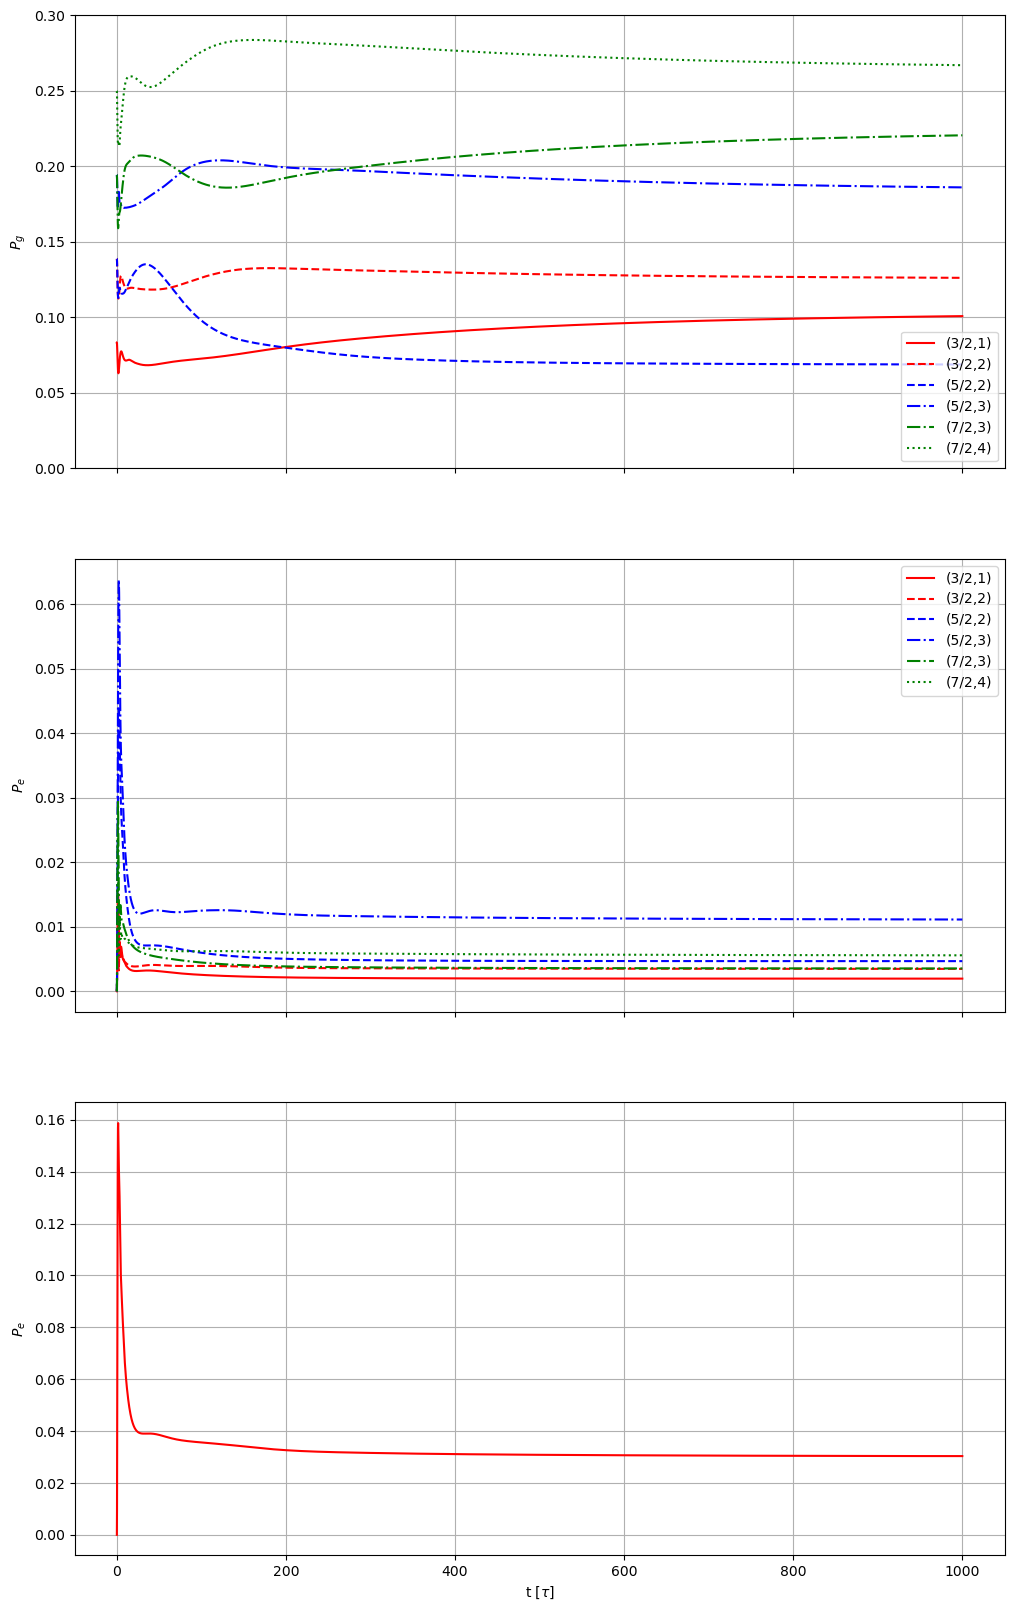

In [26]:
fig, (axa, axb, axc) = plt.subplots(3, 1, sharex=True, figsize=[12,20])

obe.set_initial_position_and_velocity(np.array([0,0,0]),np.array([0,0,0]))
obe.set_initial_rho_from_populations(np.concatenate(([1/36]*36,[0]*36)))
obe.evolve_density([0,1000/gammasim],
                rtol=1e-6,
                atol=np.concatenate(([1e-6]*72*72,[1/velocity_unit,1/velocity_unit,1/velocity_unit,1e-2/cm_unit,1e-2/cm_unit,1e-2/cm_unit])),
                method="RK23",
                progress_bar=True);

axa.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,0:3],axis=1), 'r-', label=f"(3/2,1)")
axa.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,3:8],axis=1), 'r--', label=f"(3/2,2)")
axa.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,8:13],axis=1), 'b--', label=f"(5/2,2)")
axa.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,13:20],axis=1), 'b-.', label=f"(5/2,3)")
axa.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,20:27],axis=1), 'g-.', label=f"(7/2,3)")
axa.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,27:36],axis=1), 'g:', label=f"(7/2,4)")
axa.legend()
axa.grid()
# axa.set_xlabel("t [$\\tau$]")
axa.set_ylim([0,0.3])
axa.set_ylabel("$P_g$")

axb.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,36:39],axis=1), 'r-', label=f"(3/2,1)")
axb.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,39:44],axis=1), 'r--', label=f"(3/2,2)")
axb.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,44:49],axis=1), 'b--', label=f"(5/2,2)")
axb.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,49:56],axis=1), 'b-.', label=f"(5/2,3)")
axb.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,56:63],axis=1), 'g-.', label=f"(7/2,3)")
axb.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,63:72],axis=1), 'g:', label=f"(7/2,4)")
axb.legend()
axb.grid()
# axb.set_xlabel("t [$\\tau$]")
# axb.set_ylim([0,0.1])
axb.set_ylabel("$P_e$")
# axb.set_yscale('log')

axc.plot(obe.sol.t*gammasim, np.sum(np.diagonal(obe.sol.rho)[:,36:72],axis=1), 'r-')
axc.set_xlabel("t [$\\tau$]")
axc.set_ylabel("$P_e$")
axc.grid()